# [DSL] Basic Session 4_Crawling

<b>"능동적인 데이터 수집"

원하는 데이터가 있지만, 공개된 데이터가 없다면?</br>
정형화된 데이터를 구할 수 없다면?

웹크롤링을 사용해보자!

## 사전 세팅

<b>크롬드라이버 다운</b><br>
셀레늄 라이브러리로 크롤링을 진행하기 위해서는 크롬드라이버 다운 및 경로 파악 과정이 필요합니다.
<ol>
    <li>크롬 주소 창에 'Chrome://version' 입력하여 자신 컴퓨터의 크롬 버전 확인 (Chrome: xxx.x.xxxx.xx)</li>
    <li><a href = 'https://sites.google.com/chromium.org/driver/downloads?authuser=0'>크롬드라이버 다운로드</a> 사이트에 접속하여 자신의 버전 맨 앞 숫자에 맞는 크롬 드라이버 클릭</li>
    <li>컴퓨터 운영체제에 맞는 크롬드라이버 다운로드</li>
    <li>압축해제 및 chromedriver 마우스 우클릭 - 속성 - 위치로 경로 파악</li>

<b>코랩에서의 크롬드라이버 다운</b>

In [ ]:
#구글 드라이브 접속 권한 획득
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#ubuntu 업데이트
!apt-get update

#셀레늄 패키지 다운
!pip install selenium

#크롬드라이버 다운
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

#크롬드라이버 경로 설정
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

#코랩에서 작동하도록 옵션 설정
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

<b>가상환경 세팅</b><br>
가상환경 (Virtual Environments) : 자신이 원하는 Python 환경을 구성하기 위해 필요한 모듈만 담아 놓는 바구니

<b>세팅 과정</b><br>
1. Anaconda Prompt (Anaconda3) 실행<br>
2. 하위의 명령어 입력<br><br>
\#conda 업데이트<br>
conda update conda<br><br>

\#python 3.7 버전에 Crawling이라는 이름을 가진 가상환경 생성<br>
conda create --name Crawling python=3.7<br>

\#만들어진 가상환경 리스트 확인<br>
conda info --envs<br><br>

\#Crawling 이름의 가상환경 활성화 (윈도우)<br>
activate Crawling<br>
\#Crawling 이름의 가상환경 활성화 (맥)<br>
source activate Crawling<br><br>

\#jupyter notebook 실행<br>
jupyter notebook<br>

<b>패키지 다운로드</b>

In [40]:
#정보 요청 라이브러리
!pip install requests

#크롤링 라이브러리
!pip install beautifulsoup4
!pip install selenium

#구문 분석 라이브러리
!pip install lxml

#셀레늄 라이브러리
!pip install webdriver_manager

  Using cached webdriver_manager-3.8.2-py2.py3-none-any.whl (26 kB)
  Using cached python_dotenv-0.20.0-py3-none-any.whl (17 kB)


## 크롤링이란?

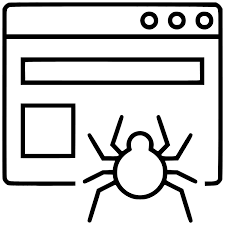

Crawling : 검색 엔진 로봇을 이용한 데이터 수집 방법<br>
Crawler : 크롤링을 위해 개발된 소프트웨어

## 크롤링의 기본원리 

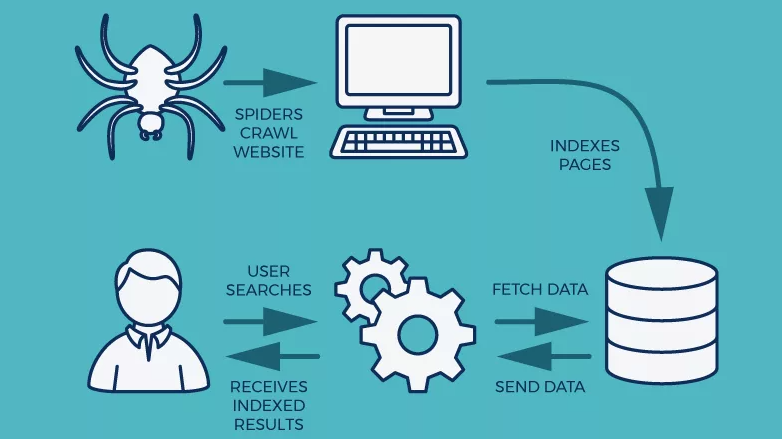

<b> 크롤링 과정 </b><br>
<ol>
    (1) 대상 선정: URL 선정<br>
    (2) 데이터 로드: 웹사이트 켜기 (HTML 문서 받기)<br>
    (3) 데이터 분석: 어떤 부분을 수집할지, 어떤 부분은 수집하지 않을지 결정<br>
    (4) 데이터 수집
</ol>    

파이썬의 크롤러로 웹서버에 정보 요청 => 서버 응답을 받은 후 웹서버와 상호작용하며 정보 획득</li>

## html 문서읽기 

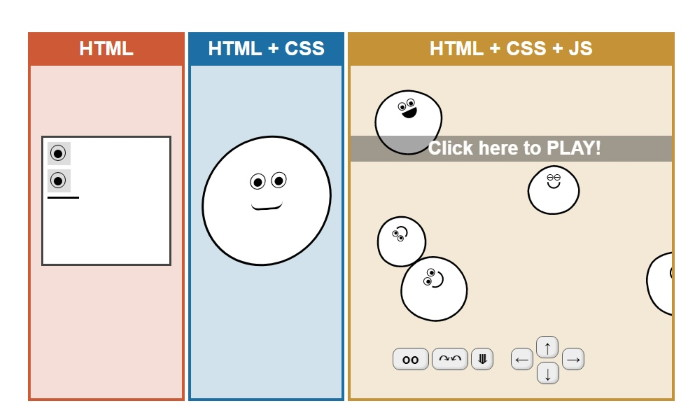

<b>웹서버의 정보 구성 방식</b><br>
HTML : 웹 브라우저에서 문서 및 웹 페이지가 표시되는 방법을 규정하는 언어 <br>
CSS : HTML로 만들어진 문서의 스타일을 지정하는 방식을 규정하는 스타일 시트 언어 <br>
JavaScript : 웹 사이트에서 HTML과 CSS의 구성요소들을 변경할 수 있게 해주는 언어 <br><br>
HTML을 사용하면 문서를 작성할 수 있고, CSS를 참조하면 디자인을 활용할 수 있으며, JavaScript를 참조하면 상호작용이 가능해진다

<b>html 문서 찾기</b><br>
<ol>
    <li>정보를 추출하고자 하는 element에 마우스 우클릭 - [검사]</li>
    <li>우측 상단 닫기 버튼 밑 Chrome 맞춤설정 및 제어 버튼 클릭 - [도구 더 보기] - [개발자도구]</li>
    <li>키보드 f12</li>
</ol>
1번의 방법이 해당 element의 html 코드를 바로 볼 수 있기에 권장 <br>
2, 3번의 경우 element를 찾기 위해서 [Select an element in the page to inspect it] or Ctrl+Shift+C - 브라우저에서 추출하고자 하는 element 클릭 과정이 더 필요

<b>html문서 예시</b>

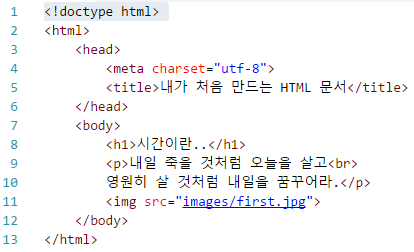

갈색 : tag <br>
tag 내부 빨간색 : type <br>
" ", ' ' 내부 파란색 : value <br>
type과 value는 tag가 지닌 attribute <br><br>

<b>XPath</b><br>
확장 생성 언어 문서의 구조를 통해 경로 위의 지정한 구문을 사용하여 항목을 배치하고 처리하는 방법을 기술하는 언어<br>
or 길고 복잡한 경로 없이 원하는 요소 또는 속성을 찾기 위한 질의어

<b>Xpath 경로 찾기</b><br>
찾은 element의 html 코드에서 마우스 우클릭 - [Copy] - [CopyXPath]

<b>크롤링 관련 html 문서에서 유의할 점</b>
<ol>
    <li>크롤링할 대상 내용들은 주로 body 태그에 존재</li>
    <li>html 문서는 열고 닫는 개념이 존재하며 그 사이에 있는 텍스트를 주로 추출</li>
    <li>tag간 부모-자식-형제 관계가 존재하므로 상하관계 파악 필요</li>
</ol>
즉, html 문서에서 내가 찾고자 하는 정보(텍스트)의 경로를 태그 상하관계 or Xpath로 파악한 뒤 해당 태그에 기입되어 있는 정보를 추출하여 사용

## 크롤링 라이브러리 비교

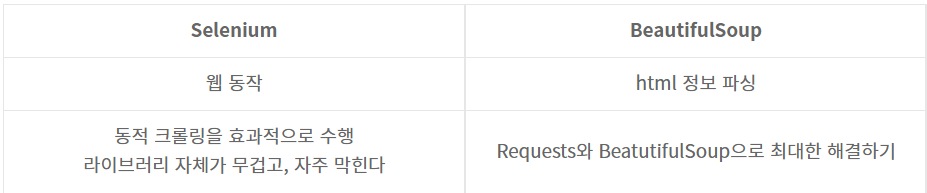

## Beautiful Soup

### HTTP 응답코드

내가 크롤링하고자 하는 사이트가 접속이 가능한지 불가능한지 알 수 있는 코드 <br><br>
1xx : 요청을 받았으며 작업이 진행 중인 경우 <br>
2xx : 요청 ok, 작업 ok <br>
4xx : 요청이 올바르지 않은 경우 <br>
5xx : 서버가 응답하지 않는 경우 <br><br>
즉 200 - 크롤링 가능, 그 외 - 크롤링 불가능 (세부 원인은 검색)

In [3]:
#정보요청 라이브러리 import
import requests

In [4]:
#네이버로 정보요청
naver = requests.get("https://www.naver.com/")

In [5]:
#네이버로부터 받은 응답코드 출력
print("응답코드 :", naver.status_code)

응답코드 : 200


In [6]:
#나도코딩 티스토리로 정보요청
tistory = requests.get("https://nadocoding1.tistory.com")

In [7]:
#나도코딩 티스토리로부터 받은 응답코드 출력
print("응답코드 :", tistory.status_code)

응답코드 : 404


In [8]:
#정상적으로 정보를 받은 경우 지속, 그렇지 않은 경우 중지
naver.raise_for_status()
print("웹 크롤링을 진행합니다.")

웹 크롤링을 진행합니다.


'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
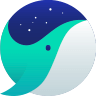
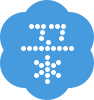

In [9]:
#네이버로부터 받은 html 문서 정보 전체 출력
naver.text

In [10]:
# 네이버 html 문서를 naver html 파일로 저장 
with open('naver.html', 'w', encoding = 'utf8') as f:
    f.write(naver.text)

### excercise: 뉴스 크롤링

In [1]:
#정보요청 라이브러리 import
import requests

#크롤링 라이브러리 import
from bs4 import BeautifulSoup 

<b>로봇으로 인식 방지</b><br>
로봇으로 인식되어 접속이 차단되는 경우를 방지하기 위한 표시 <br>
자신의 User-Agent는 <a href = 'https://www.whatismybrowser.com/detect/what-is-my-user-agent'>'what is my useragent'</a> 에서 확인

In [2]:
#User-Agent 지정
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

In [31]:
#크롤링 할 대상 url 지정
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=103'

#크롤링 대상 url과 headers를 기반으로 정보 요청
res = requests.get(url, headers = headers)

#정상적으로 정보를 받은 경우 지속, 그렇지 않은 경우 중지
res.raise_for_status()

#html문서를 beautifulsoup의 lxml 형태로 변환
soup = BeautifulSoup(res.text, 'lxml') 

<b>단일추출</b>

In [32]:
#html문서에서 cluster_text이라는 이름의 class를 지닌 div element를 선택
div1 = soup.find('div', attrs = {'class' : 'cluster_text'})

#선택한 element 내용 출력
div1

<div class="cluster_text">
<a class="cluster_text_headline nclicks(cls_lif.clsart)" href="https://n.news.naver.com/mnews/article/448/0000366836?sid=103">청와대의 한여름 밤 정취 느껴볼까…12일간 야간 개방</a>
<div class="cluster_text_lede">지난 5월 청와대가 일반인에 개방돼 인기를 끌었는데요, 오늘부턴 청와대 밤 풍경을 감상할 수 있게 됐습니다. 음악까지 더해진 한여름 밤의 청와대 임서인  …</div>
<div class="cluster_text_info _rcount" data-comment="{gno:'news448,0000366836',params:{sid1:'103'},nclicks:'cmt.count','type':'sectionHomeCluster'}">
<div class="cluster_text_press">TV조선</div>
</div>
</div>

In [33]:
#div1 element에서 첫번째로 발견되는 a element를 반환
div1.a

<a class="cluster_text_headline nclicks(cls_lif.clsart)" href="https://n.news.naver.com/mnews/article/448/0000366836?sid=103">청와대의 한여름 밤 정취 느껴볼까…12일간 야간 개방</a>

In [34]:
#div1 element에서 첫번째로 발견되는 a element의 attribute 추출
div1.a.attrs

{'href': 'https://n.news.naver.com/mnews/article/448/0000366836?sid=103',
 'class': ['cluster_text_headline', 'nclicks(cls_lif.clsart)']}

In [35]:
#div1 element에서 첫번째로 발견되는 a element의 class attribute 정보 추출
div1.a['class']

['cluster_text_headline', 'nclicks(cls_lif.clsart)']

In [36]:
#div1 element에서 첫번째로 발견되는 a element의 글자 추출
div1.a.get_text()

'청와대의 한여름 밤 정취 느껴볼까…12일간 야간 개방'

<b>다중추출</b>

In [37]:
#html문서에서 cluster_text_headline nclicks(cls_lif.clsart)라는 이름의 class를 지닌 a 태그의 element들 모두 선택
a1 = soup.findAll('a', attrs = {'class' : 'cluster_text_headline nclicks(cls_lif.clsart)'})

#선택한 element들 내용 출력
a1

[<a class="cluster_text_headline nclicks(cls_lif.clsart)" href="https://n.news.naver.com/mnews/article/448/0000366836?sid=103">청와대의 한여름 밤 정취 느껴볼까…12일간 야간 개방</a>,
 <a class="cluster_text_headline nclicks(cls_lif.clsart)" href="https://n.news.naver.com/mnews/article/052/0001766386?sid=103">'한여름 밤의 청와대 산책' 오늘부터 12일간 개최</a>,
 <a class="cluster_text_headline nclicks(cls_lif.clsart)" href="https://n.news.naver.com/mnews/article/055/0000987351?sid=103">청와대 누적 관람 130여만 명…야간 개방 시작</a>,
 <a class="cluster_text_headline nclicks(cls_lif.clsart)" href="https://n.news.naver.com/mnews/article/001/0013321768?sid=103">"밤에도 매력 만점"…청와대에서 느끼는 여름밤의 정취</a>,
 <a class="cluster_text_headline nclicks(cls_lif.clsart)" href="https://n.news.naver.com/mnews/article/055/0000987291?sid=103"> 밤부터 전국 장맛비…남해안 강한 비 주의[날씨]</a>,
 <a class="cluster_text_headline nclicks(cls_lif.clsart)" href="https://n.news.naver.com/mnews/article/277/0005120801?sid=103">오늘 밤 남부부터 전국에 장맛비[날씨]</a>,
 <a class="cluster_text_headline nclicks(c

In [30]:
#각 뉴스 제목과 링크를 추출할 반복문 생성
for a in a1:
    
    #a 태그의 element의 text 선택 및 공백 제거
    title = a.get_text()
    
    #a 태그의 element 내에서 href class attribute 정보 추출 및 링크 생성
    link = a['href']
    
    #기사 제목과 해당 링크 출력
    print(f'기사 제목 : {title}') 
    print(f'(링크 : {link})')

기사 제목 : 이미경 CJ 부회장, 국제 에미상 공로상 수상자로 선정
(링크 : https://n.news.naver.com/mnews/article/016/0002017965?sid=103)
기사 제목 : 이미경 CJ 부회장, 국제 에미상 공로상 받는다
(링크 : https://n.news.naver.com/mnews/article/011/0004078100?sid=103)
기사 제목 : '한류 선봉장' 이미경 CJ 부회장, 국제 에미상 공로상 받는다
(링크 : https://n.news.naver.com/mnews/article/469/0000687099?sid=103)
기사 제목 : 이미경 CJ 부회장, 국제 에미상 공로상 수상자 선정
(링크 : https://n.news.naver.com/mnews/article/366/0000828632?sid=103)
기사 제목 :  밤새 전국 장맛비·남해안 비바람 집중‥비 그친 뒤 낮엔 무더위[날씨]
(링크 : https://n.news.naver.com/mnews/article/214/0001210411?sid=103)
기사 제목 :  오늘 밤부터 전국 '장맛비'...남해안 국지성 호우 주의[날씨]
(링크 : https://n.news.naver.com/mnews/article/052/0001766568?sid=103)
기사 제목 :  내일 오전까지 전국에 장맛비, 남해안 80mm↑[뉴스7 날씨]
(링크 : https://n.news.naver.com/mnews/article/057/0001678243?sid=103)
기사 제목 : 전국에 오전까지 장맛비…비 그친 다시 무더위
(링크 : https://n.news.naver.com/mnews/article/056/0011306002?sid=103)
기사 제목 : "디지털 놀이터에서 K문화 즐겨라"…韓홍보관 '하이커 그라운드'
(링크 : https://n.news.naver.com/mnews/article/018/0005272827?sid=103)
기사 제목 : 초

In [71]:
#페이지 별로 추출하는 반복문 생성
for i in range(5):
    #페이지 별로 요청을 보내고 soup의 lxml 형태로 변환
    url = f'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=103#&date=%2000:00:00&page={i}'
    res = requests.get(url, headers = headers)
    res.raise_for_status()
    soup = BeautifulSoup(res.text, 'lxml') 
    
    #html문서에서 cluster_text_headline nclicks(cls_lif.clsart)라는 이름의 class를 지닌 a 태그의 element들 모두 선택
    a2 = soup.findAll('a',attrs = {'class': 'cluster_text_headline nclicks(cls_lif.clsart)'})
    
    #각 뉴스 제목과 링크를 추출할 반복문 생성
    for a in a2:
        title = a.get_text().strip()
        link = a['href']
        print(f'기사 제목 : {title}') 
        print(f'(링크 : {link})')

기사 제목 : '기생충·헤어질 결심' K무비 이끈 CJ 이미경, 국제에미상 공로상
(링크 : https://n.news.naver.com/mnews/article/448/0000366751?sid=103)
기사 제목 : 이미경 CJ 부회장, 국제 에미상 공로상 수상…韓 영화계 공신
(링크 : https://n.news.naver.com/mnews/article/015/0004726453?sid=103)
기사 제목 : 한류 기여한 이미경 CJ 부회장 '국제 에미상 공로상'
(링크 : https://n.news.naver.com/mnews/article/015/0004726882?sid=103)
기사 제목 : "25년 넘게 선봉에서 한류 이끌어"…이미경 부회장, 국제 에미상 공로상
(링크 : https://n.news.naver.com/mnews/article/009/0004994219?sid=103)
기사 제목 : 밤부터 전국에 장맛비…남해안 최대 80mm
(링크 : https://n.news.naver.com/mnews/article/056/0011305688?sid=103)
기사 제목 : 밤부터 전국 장맛비…새벽에 남해안 강한 비[퇴근길 날씨]
(링크 : https://n.news.naver.com/mnews/article/056/0011305809?sid=103)
기사 제목 : 밤부터 전국 장맛비…내일 출근길 남해안 집중호우[날씨]
(링크 : https://n.news.naver.com/mnews/article/422/0000552021?sid=103)
기사 제목 : 밤부터 전국 장맛비…남해안 강한 비 주의[날씨]
(링크 : https://n.news.naver.com/mnews/article/055/0000987291?sid=103)
기사 제목 : 오늘내일과 주말 두 차례 장맛비…그 사이 폭염·소나기
(링크 : https://n.news.naver.com/mnews/article/001/0013322895?sid=103)
기사 제목 : 오늘 밤부터 전국 

## Selenium 

### excercise: 항공권 크롤링

In [41]:
#셀레늄 라이브러리 불러오기
from selenium import webdriver

from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

#셀레늄에서 html문서가 생성될 때까지 대기하는 함수 불러오기
from selenium.webdriver.support.ui import WebDriverWait

#셀레늄에서 조건을 걸어줄 수 있는 함수 불러오기
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [42]:
#드라이버 객체 생성
browser = webdriver.Chrome(service = Service(ChromeDriverManager().install()))

In [45]:
#네이버 항공권 예매 사이트로 접속
browser.get('https://flight.naver.com/')

In [46]:
#가는 날 클릭
dep_day = browser.find_element(by = By.XPATH, value = '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[2]/button[1]').click()

In [47]:
#8월 28일, 29일 선택
browser.find_element(by = By.XPATH, value = '//*[@id="__next"]/div/div[1]/div[9]/div[2]/div[1]/div[2]/div/div[3]/table/tbody/tr[5]/td[1]/button').click()
browser.implicitly_wait(time_to_wait=2)
browser.find_element(by = By.XPATH, value = '//*[@id="__next"]/div/div[1]/div[9]/div[2]/div[1]/div[2]/div/div[3]/table/tbody/tr[5]/td[2]/button').click()

In [48]:
#도착지 선택
browser.find_element(by = By.XPATH, value = '//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[1]/button[2]/i').click()

In [49]:
#국내 선택
browser.find_element(by = By.XPATH, value = '//*[@id="__next"]/div/div[1]/div[9]/div[2]/section/section/button[1]').click()

In [50]:
#제주 선택
browser.find_element(by = By.XPATH, value = '//*[@id="__next"]/div/div[1]/div[9]/div[2]/section/section/div/button[2]').click()

In [51]:
# 항공권 검색 클릭
browser.find_element(by = By.XPATH, value = '//*[@id="__next"]/div/div[1]/div[4]/div/div/button').click()

try:
    #10초 간 대기하면서 지정한 xpath가 존재 시 동작 수행
    elem = WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="__next"]/div/div[1]/div[5]/div/div[2]/div[2]')))
    # 성공했을 때 첫 번째 결과 출력
    print(elem.text)
finally:
    browser.quit()

에어서울
06:00GMP
07:00CJU
01시간 00분
할인석편도 90,200원~
삼성카드 결제시 1.5% 캐시백편도 89,310원~


## 이미지 크롤링

### excercise: 의류 이미지 크롤링

<b>beautiful soup</b>

In [52]:
#정보요청 라이브러리1 불러오기
import requests

#정보요청 라이브러리2 불러오기
import urllib

#beautifulsoup 라이브러리 불러오기
from bs4 import BeautifulSoup 

In [53]:
#크롤링 할 대상 url 지정
url = 'https://www.musinsa.com/ranking/best'

#크롤링 대상 url과 headers를 기반으로 정보 요청
res = requests.get(url, headers = headers)

#정상적으로 정보를 받은 경우 지속, 그렇지 않은 경우 중지
res.raise_for_status()

#html문서를 beautifulsoup의 lxml 형태로 변환
soup = BeautifulSoup(res.text, 'lxml') 

In [54]:
#html문서에서 lazyload lazy라는 이름의 class를 지닌 img 태그의 element들 모두 선택
imgs = soup.findAll('img',attrs = {"class" : "lazyload lazy"})

In [55]:
#이미지 다운로드 반복문
for index, img in enumerate(imgs):
    try:
        image_url = img['data-original']
        urllib.request.urlretrieve(image_url, "C:/Users/endea/Downloads/image_crawling/" + '옷' + str(index) + '.jpg')
        
        #이미지 개수 10개 초과시 반복문 탈출
        if index > 9:
            break 
    except:
        pass

### excercise: 얼굴 이미지 크롤링

<b> selenium </b>

In [56]:
#셀레늄 라이브러리 불러오기
from selenium import webdriver

from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

#키보드 자판을 입력할 수 있는 셀레늄 함수 불러오기
from selenium.webdriver.common.keys import Keys

#시간에 따른 컨트롤이 가능한 라이브러리 불러오기
import time

In [57]:
#드라이버 객체 생성
browser = webdriver.Chrome(service = Service(ChromeDriverManager().install()))

In [58]:
#구글 검색 사이트로 접속
browser.get('https://www.google.co.kr/')

In [59]:
#검색창 경로 찾은 후 검색어 입력 후 엔터
browser.find_element(by = By.XPATH, value = '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys('face portrait photography')
browser.find_element(by = By.XPATH, value = '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys(Keys.ENTER)

In [60]:
#이미지 블럭 클릭
browser.find_element(by = By.XPATH, value = '//*[@id="hdtb-msb"]/div[1]/div/div[2]/a').click()

In [9]:
#스크롤 시 이미지가 더 많이 생성되므로 자동으로 스크롤 하는 반복문 생성
while True:
    
    #현재 문서의 스크롤 높이를 저장
    now_scroll = browser.execute_script('return document.body.scrollHeight')
    
    #페이지 최하단으로 스크롤
    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    
    #페이지 로딩 대기
    time.sleep(1)
    
    #스크롤 한 문서의 스크롤 높이를 저장
    last_scroll = browser.execute_script('return document.body.scrollHeight')
    
    #현재 높이와 이전 높이가 같은 경우 반복문을 탈출하는 조건문 생성
    if now_scroll == last_scroll:
        
        #더보기 버튼이 있는 경우 클릭 후 탈출 그 외는 그냥 탈출
        try:
            browser.find_element(by = By.CSS_SELECTOR,value = '.mye4qd').click()
            break
        except:
            break

In [10]:
#페이지에서 이미지에 해당하는 css 태그를 지정해 이미지 찾기
images = browser.find_elements(by= By.CSS_SELECTOR,value = '.rg_i.Q4LuWd')

In [18]:
#찾은 이미지 개수 초기값 지정
num = 1
#이미지들마다 클릭하여 원본 이미지를 불러올 수 있도록 하는 반복문
for image in images: 
    try:
        #이미지 클릭
        image.click()
        #이미지 로딩 대기
        time.sleep(4)
        #이미지 url 지정
        image_url = browser.find_element(by = By.XPATH, value = '//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img').get_attribute('src')
        #자동화로 접속할 수 없는 경우 opener 함수로 접속할 수 있게 함수 생성
        opener = urllib.request.build_opener()
        #사용자 헤더 지정
        opener.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36')]
        #opener 함수로 이미지 접속
        urllib.request.install_opener(opener)
        #확장자와 위치를 설정해 해당 이미지를 다운로드
        urllib.request.urlretrieve(image_url, "C:/Users/endea/Downloads/image_crawling/" + '얼굴' + str(num) + '.jpg')
        #이미지 개수 1 증가
        num += 1
        #이미지 개수 10개 초과 시 반복문 탈출
        if num > 10:
            break
    except:
        pass

In [19]:
#드라이버 종료
browser.close()

## tips for crawling

<ol>
    <li>beautifulsoup과 selenium의 각 장점을 파악하고 상황 별로 활용</li>
    <li>html 문서에서 내가 추출하고자 하는 element의 공통되고 독특한 특징을 잘 파악</li>
    <li>중간에 끊기지 않도록 try: except: 구문 활용</li>
</ol>

## 과제

EDA 데이터셋에 맞게 beautiful soup 또는 selenium 이용해서 크롤링해보기

<b>selenium 예시</b><br>
항공권 가격 크롤링<br>
상단의 항공권 검색 예시에서 이어집니다!

In [49]:
# 항공권 클릭
browser.find_element(by = By.XPATH, value = '//*[@id="__next"]/div/div[1]/div[4]/div/div/button').click()

In [55]:
# 페이지의 항공편 정보 수집
flights = browser.find_elements(by = By.CLASS_NAME, value = "domestic_price__1qAgw")

# 가격 정보 추출 반복문
for flight in flights:
    price = flight.find_element(by = By.TAG_NAME, value = "i").text
    if (price != ''):
        print(price)

90,200
89,310
109,800
108,120
91,800
90,400
127,800
125,840
164,800
162,270
91,800
90,400
127,800
125,840
164,800
162,270
90,700
89,310
94,800
91,550
109,800
108,120
109,800
105,950
169,800
163,550
97,100
94,240
108,200
104,900
90,700
89,310
91,800
90,400
109,800
108,120
127,800
125,840
164,800
162,270


<b>beautiful soup 예시</b><br>
호텔 평점 크롤링

In [87]:
#크롤링 할 대상 url 지정
url = 'https://www.booking.com/reviews.ko.html'

#크롤링 대상 url과 headers를 기반으로 정보 요청
res = requests.get(url, headers = headers)

#정상적으로 정보를 받은 경우 지속, 그렇지 않은 경우 중지
res.raise_for_status()

#html문서를 beautifulsoup의 lxml 형태로 변환
soup = BeautifulSoup(res.text, 'lxml') 

In [91]:
review = soup.findAll('div',attrs = {'class' : 'rlp-main-section-hotel__subcontainer'})

In [92]:
review

[<div class="rlp-main-section-hotel__subcontainer">
 <a class="rlp-main-section-hotel__name" href="/reviews/kr/hotel/soo-song-guest-house.ko.html?label=gen173nr-1FEgdyZXZpZXdzKIICOOgHSBdYBGh9iAEBmAEXuAEXyAEM2AEB6AEB-AECiAIBqAIDuALdkOGWBsACAdICJGRmZWFiZTNhLWExMDQtNDcyYS1iODdiLTZkMzU2YTI1YzM1NtgCBeACAQ&amp;sid=6d857fadfbc50487e92745845aee6e1b" target="_blank">수송게스트하우스</a>
 <p class="rlp-main-section-hotel__location">
 <a class="rlp-main-section-hotel__geo" href="/reviews/kr/city/seoul.ko.html?label=gen173nr-1FEgdyZXZpZXdzKIICOOgHSBdYBGh9iAEBmAEXuAEXyAEM2AEB6AEB-AECiAIBqAIDuALdkOGWBsACAdICJGRmZWFiZTNhLWExMDQtNDcyYS1iODdiLTZkMzU2YTI1YzM1NtgCBeACAQ&amp;sid=6d857fadfbc50487e92745845aee6e1b&amp;tmpl=reviews_landing&amp;page=0;page_size=0;type=all&amp;">서울</a>,
 <a class="rlp-main-section-hotel__geo" href="/reviews/country/kr.ko.html?label=gen173nr-1FEgdyZXZpZXdzKIICOOgHSBdYBGh9iAEBmAEXuAEXyAEM2AEB6AEB-AECiAIBqAIDuALdkOGWBsACAdICJGRmZWFiZTNhLWExMDQtNDcyYS1iODdiLTZkMzU2YTI1YzM1NtgCBeACAQ&amp;si

In [94]:
#각 리뷰의 호텔명과 평점을 추출할 반복문 생성
for r in review:
    
    #r 태그 > a 태그 element의 text 선택
    hotel = r.a.get_text()
    #r 태그 > span 태그 element의 text 선택
    score = r.span.get_text()

    #기사 제목과 해당 링크 출력
    print(f'호텔명 : {hotel}') 
    print(f'{score}') 

호텔명 : 수송게스트하우스

이용 후기 평점 : 9.2

호텔명 : 감귤향기힐링파크

이용 후기 평점 : 7.7

호텔명 : 포포인츠 바이 쉐라톤 조선, 서울역

이용 후기 평점 : 8.1

호텔명 : 노떼 라 미아 호텔

이용 후기 평점 : 8.9

호텔명 : 인천공항 게스트하우스

이용 후기 평점 : 8.2

호텔명 : 머큐어 앰배서더 서울 홍대

이용 후기 평점 : 8.9

호텔명 : 평창 라마다 호텔&스위트 바이윈덤

이용 후기 평점 : 8.2

호텔명 : 와랑게스트하우스

이용 후기 평점 : 8.6

호텔명 : 라마다 프라자 호텔

이용 후기 평점 : 8.1

호텔명 : JK 블라썸 호텔

이용 후기 평점 : 8



## Reference

크롤링 원리: https://www.youtube.com/watch?v=Yj-QtqxuzTk<br>
셀레니움4 메소드: https://goodthings4me.tistory.com/696<br>
22-1 기초세션 크롤링 코드